<a href="https://colab.research.google.com/github/eTcilopp/geek_brains/blob/main/044_machine_learning/hw05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Домашняя работа № 5
Используя набор данных о домах, примените метрики для оценки качества модели регрессии. Затем, используя набор данных об ирисах, примените метрики для оценки качества модели классификации.

Шаги для выполнения задания:

1. Загрузите набор данных о домах и набор данных об ирисах.

2. Разделите данные на обучающую и тестовую выборки.

3. Создайте модель регрессии и обучите ее на обучающей выборке.

4. Примените метрики для оценки качества модели регрессии на тестовой выборке.

5. Создайте модель классификации и обучите ее на обучающей выборке.

6. Примените метрики для оценки качества модели классификации на тестовой выборке.

In [51]:
from sklearn import datasets
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
from sklearn.metrics import (
    mean_squared_error, mean_absolute_error, r2_score, accuracy_score,
    precision_score, recall_score, f1_score, classification_report,
    confusion_matrix
)
import seaborn as sns
import matplotlib.pyplot as plt

In [17]:
boston = datasets.load_boston()

ImportError: 
`load_boston` has been removed from scikit-learn since version 1.2.

The Boston housing prices dataset has an ethical problem: as
investigated in [1], the authors of this dataset engineered a
non-invertible variable "B" assuming that racial self-segregation had a
positive impact on house prices [2]. Furthermore the goal of the
research that led to the creation of this dataset was to study the
impact of air quality but it did not give adequate demonstration of the
validity of this assumption.

The scikit-learn maintainers therefore strongly discourage the use of
this dataset unless the purpose of the code is to study and educate
about ethical issues in data science and machine learning.

In this special case, you can fetch the dataset from the original
source::

    import pandas as pd
    import numpy as np

    data_url = "http://lib.stat.cmu.edu/datasets/boston"
    raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
    data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
    target = raw_df.values[1::2, 2]

Alternative datasets include the California housing dataset and the
Ames housing dataset. You can load the datasets as follows::

    from sklearn.datasets import fetch_california_housing
    housing = fetch_california_housing()

for the California housing dataset and::

    from sklearn.datasets import fetch_openml
    housing = fetch_openml(name="house_prices", as_frame=True)

for the Ames housing dataset.

[1] M Carlisle.
"Racist data destruction?"
<https://medium.com/@docintangible/racist-data-destruction-113e3eff54a8>

[2] Harrison Jr, David, and Daniel L. Rubinfeld.
"Hedonic housing prices and the demand for clean air."
Journal of environmental economics and management 5.1 (1978): 81-102.
<https://www.researchgate.net/publication/4974606_Hedonic_housing_prices_and_the_demand_for_clean_air>


Определенно, датасет имеет этические проблемы с т.з. некоторых пользователей<br>
Скачаем файл непосредственно в Colab

In [26]:
houses_df = pd.read_csv('/content/HousingData.csv')

Проведем EDA

In [27]:
houses_df.head(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7


In [28]:
houses_df.shape

(506, 14)

In [29]:
houses_df.isnull().sum()

,0
CRIM,20
ZN,20
INDUS,20
CHAS,20
NOX,0
RM,0
AGE,20
DIS,0
RAD,0
TAX,0


Данных с пропусками относително мало - можно воспользоваться медианными значениями

In [30]:
houses_df.fillna(houses_df.median(), inplace=True)

In [31]:
houses_df.isnull().sum()

,0
CRIM,0
ZN,0
INDUS,0
CHAS,0
NOX,0
RM,0
AGE,0
DIS,0
RAD,0
TAX,0


In [33]:
target = houses_df['MEDV']
data = houses_df.drop('MEDV', axis=1)

In [34]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=42)

In [35]:
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)
y_test_pred = model_lr.predict(X_test)

In [36]:
mae = mean_absolute_error(y_test, y_test_pred)
mse = mean_squared_error(y_test, y_test_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_test_pred)

print("MSE:", mse)
print("RMSE:", rmse)
print("MAE:", mae)
print("R2:", r2)

MSE: 24.999384790103406
RMSE: 4.999938478631853
MAE: 3.148737317023763
R2: 0.6591013893903506


# Выводы:
Судя по значению R2, модель объясняет 66% вариации.<br>
Достаточно хороший показатель -учитывая, что модель никак не оптимизирована.<br>
Значения MSE, MAE мало о чем говорят - их можно использовать в процессе<br>оптимизации модели, сравнивая модель "саму с собой"



---

Скачаем датасет с цветочками



In [42]:
iris = datasets.load_iris()

In [43]:
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [46]:
model_svm = SVC()
model_svm.fit(X_train, y_train)
y_test_pred = model_svm.predict(X_test)

In [53]:
accuracy = accuracy_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred, average='weighted')
recall = recall_score(y_test, y_test_pred, average='weighted')
classification_report_str = classification_report(y_test, y_test_pred)
confusion_matrix_report = confusion_matrix(y_test, y_test_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("Classification Report:\n", classification_report_str)

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



Модель показывает феноменальные результаты - везде 100% успеха!

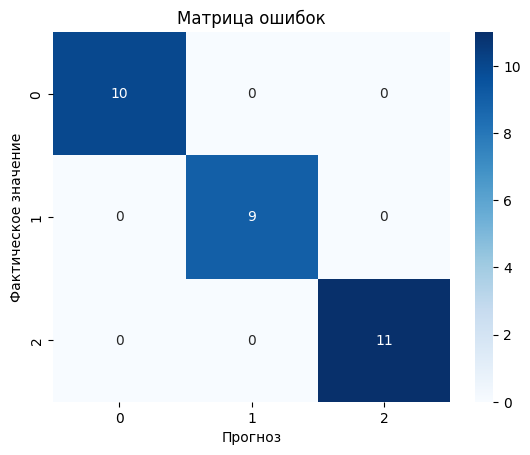

In [54]:
# Визуализация матрицы ошибок
sns.heatmap(confusion_matrix_report, annot=True, fmt="d", cmap = "Blues")
plt.xlabel("Прогноз")
plt.ylabel("Фактическое значение")
plt.title("Матрица ошибок")
plt.show();

# Выводы:
Метрики качества позволяют понять, насколько модель хорошо работает и что нужно делать, если этого уровня "хорошо" недостаточно.<br>
В нашем случае понятно, что с моделью классификации делать ничего не нужно: модель прекрасно справляется с задачей. <br>
В случае с домами можно последовательно применять арсенал средств: <br>
- лучше подготовить данные<br>
- подобрать гиперпараметры<br>
- уменьшить размерность<br>
На каждом шаге оптимизации можно следить за изменением метрик качества, чтобы получить желаемый результат.